<a href="https://colab.research.google.com/github/Alexcelsior/BechdelTestDASK/blob/main/DaskLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
!pip install "dask[complete]"
import dask.dataframe as dd
import pandas as pd
!pip install "dask[dataframe]" 
!pip install aiohttp
import warnings
warnings.filterwarnings("ignore")
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score
import joblib
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")



df = dd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/589ff087bc8f69677fc20c6e6efe99ded01d0c95/bechdel/movies.csv")


In [57]:
from dask_ml.model_selection import train_test_split

In [93]:
#need to reomve na from this spreadsheet
df.dropna()
df.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [94]:
df2 = df.loc[:, ~df.columns.isin(['imdb', 'test', 'domgross' , 'title','clean_test','code','period code', 'decade code'])]
df2.head()

,year,binary,budget,intgross,budget_2013$,domgross_2013$,intgross_2013$
0,2013,FAIL,13000000,42195766.0,13000000,25682380.0,42195766.0
1,2012,PASS,45000000,40868994.0,45658735,13611086.0,41467257.0
2,2013,FAIL,20000000,158607035.0,20000000,53107035.0,158607035.0
3,2013,FAIL,61000000,132493015.0,61000000,75612460.0,132493015.0
4,2013,FAIL,40000000,95020213.0,40000000,95020213.0,95020213.0


In [95]:
df3 = df2.rename(columns={"budget_2013$": "budget_2013", "domgross_2013$": "domgross_2013", "intgross_2013$": "intgross_2013", "binary":"bechdelpass"})  

In [96]:
df3.head()

,year,bechdelpass,budget,intgross,budget_2013,domgross_2013,intgross_2013
0,2013,FAIL,13000000,42195766.0,13000000,25682380.0,42195766.0
1,2012,PASS,45000000,40868994.0,45658735,13611086.0,41467257.0
2,2013,FAIL,20000000,158607035.0,20000000,53107035.0,158607035.0
3,2013,FAIL,61000000,132493015.0,61000000,75612460.0,132493015.0
4,2013,FAIL,40000000,95020213.0,40000000,95020213.0,95020213.0


In [97]:
 df3.describe().compute()

,year,budget,intgross,budget_2013,domgross_2013,intgross_2013
count,1794.000000,1.794000e+03,1.783000e+03,1.794000e+03,1.776000e+03,1.783000e+03
mean,2002.552397,4.482646e+07,1.503857e+08,5.546461e+07,9.517478e+07,1.978380e+08
std,8.979731,4.818603e+07,2.103353e+08,5.491864e+07,1.259653e+08,2.835079e+08
min,1970.000000,7.000000e+03,8.280000e+02,8.632000e+03,8.990000e+02,8.990000e+02
25%,1998.000000,1.200000e+07,2.612947e+07,1.606892e+07,2.054659e+07,3.323260e+07
50%,2005.000000,2.800000e+07,7.648246e+07,3.699579e+07,5.599364e+07,9.623964e+07
75%,2009.000000,6.000000e+07,1.898509e+08,7.833790e+07,1.216784e+08,2.414790e+08
max,2013.000000,4.250000e+08,2.783919e+09,4.614359e+08,1.771683e+09,3.171931e+09


In [117]:
dfBT = df3["bechdelpass"]
dfBT.head()

0    FAIL
1    PASS
2    FAIL
3    FAIL
4    FAIL
Name: bechdelpass, dtype: object

In [100]:
df4 = df3.loc[:, ~df3.columns.isin(['bechdelpass'])]
df4.describe().compute()
df4.head()


,year,budget,intgross,budget_2013,domgross_2013,intgross_2013
0,2013,13000000,42195766.0,13000000,25682380.0,42195766.0
1,2012,45000000,40868994.0,45658735,13611086.0,41467257.0
2,2013,20000000,158607035.0,20000000,53107035.0,158607035.0
3,2013,61000000,132493015.0,61000000,75612460.0,132493015.0
4,2013,40000000,95020213.0,40000000,95020213.0,95020213.0


In [118]:
df4['budgetlog']=np.log(df4['budget'])
df4['intgrosslog']=np.log(df4['intgross'])
df4['budg2013log']=np.log(df4['budget_2013'])
df4['domgross2013log']=np.log(df4['domgross_2013'])
df4['intgross2013log']=np.log(df4['intgross_2013'])



df4.head()

,year,budget,intgross,budget_2013,domgross_2013,intgross_2013,yearlog,budgetlog,intgrosslog,budg2013log,domgross2013log,intgross2013log
0,2013,13000000,42195766.0,13000000,25682380.0,42195766.0,3.303844,16.380460,17.557830,16.380460,17.061316,17.557830
1,2012,45000000,40868994.0,45658735,13611086.0,41467257.0,3.303628,17.622173,17.525882,17.636705,16.426395,17.540415
2,2013,20000000,158607035.0,20000000,53107035.0,158607035.0,3.303844,16.811243,18.881940,16.811243,17.787820,18.881940
3,2013,61000000,132493015.0,61000000,75612460.0,132493015.0,3.303844,17.926384,18.702040,17.926384,18.141132,18.702040
4,2013,40000000,95020213.0,40000000,95020213.0,95020213.0,3.303844,17.504390,18.369600,17.504390,18.369600,18.369600


In [119]:
df5 = df4.loc[:, ~df4.columns.isin(['budget', 'intgross', 'budget_2013' , 'domgross_2013','intgross_2013','yearlog'])]
df5.head()

,year,budgetlog,intgrosslog,budg2013log,domgross2013log,intgross2013log
0,2013,16.380460,17.557830,16.380460,17.061316,17.557830
1,2012,17.622173,17.525882,17.636705,16.426395,17.540415
2,2013,16.811243,18.881940,16.811243,17.787820,18.881940
3,2013,17.926384,18.702040,17.926384,18.141132,18.702040
4,2013,17.504390,18.369600,17.504390,18.369600,18.369600


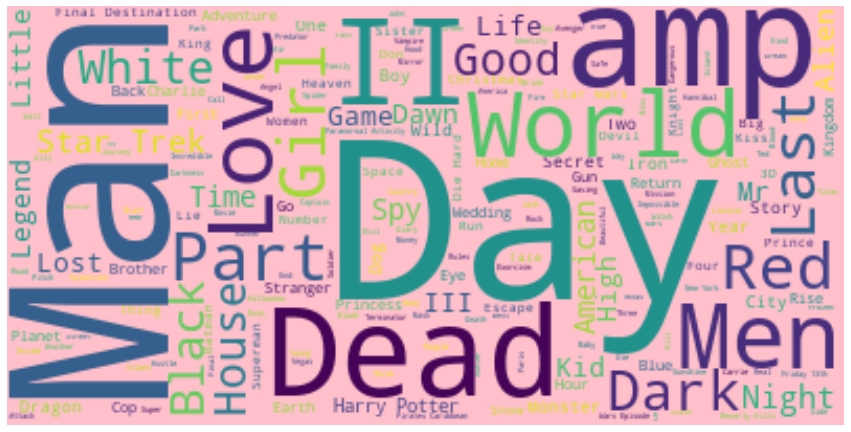

In [62]:
from wordcloud import WordCloud

# Generate a word cloud image, and note, in general even the word Man and Men are much more common in titles.
wordcloud = WordCloud(background_color="pink").generate(" ".join(df["title"]))
plt.figure(figsize=(15,10))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()
# Two of the biggest words are 'Man' and 'Men'. 

In [120]:
# This is the feature set
X = df5[[ "budg2013log", "domgross2013log"]]

# This is the target variable
Y = df5["intgross2013log"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Because your data can fit into memory,
# persist it to the RAM
X_train.persist()
X_test.persist()
y_train.persist()
y_test.persist()

Dask Series Structure:
npartitions=1
    float64
        ...
Name: intgross2013log, dtype: float64
Dask Name: split, 1 tasks

In [ ]:
# Random forest classifier
rf_params = {"max_depth": [2, 4, 8, 16]}

rf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_model,
                           param_grid=rf_params,
                           return_train_score=True,
                           iid=True,
                           cv=4,
                           n_jobs=-1, 
                           scoring='roc_auc')